## Logistic Regression

- Data Preparation
- Visualization
- Create Train adn Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dumy Data Generation

In [2]:
## Suppose there are two clusters and two features


# For cluster0
mean0 = np.array([1, 0.5])
covariance0 = np.array([[1, 0.1], [0.1, 1.2]])

# For cluster1
mean1 = np.array([4, 5])
covariance1 = np.array([[1.2, 0.1],[0.1, 1.3]])

In [3]:
class0 = np.random.multivariate_normal(mean0, covariance0, size = 500)
class1 = np.random.multivariate_normal(mean1, covariance1, size = 500)

In [4]:
class0.shape, class1.shape # These are two datasets belongs to two different classes

((500, 2), (500, 2))

### Visualization

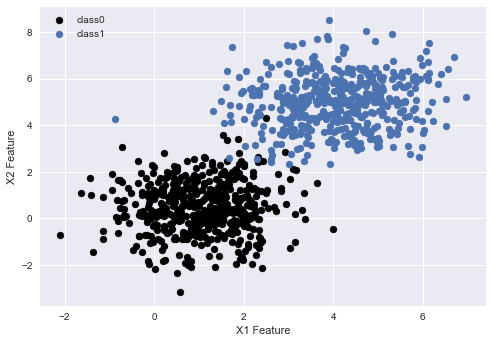

In [5]:
plt.style.use("seaborn")
plt.scatter(x = class0[:, 0], y = class0[:, 1], color = "black", label = "class0")
plt.scatter(x = class1[:, 0], y = class1[:, 1], label = "class1")
plt.xlabel("X1 Feature")
plt.ylabel("X2 Feature")
plt.legend();

In [6]:
### Preparing Dataset

In [7]:
dataset = np.vstack((class0, class1)) # One below another

In [8]:
dataset.shape

(1000, 2)

In [9]:
# Now need to add column Y as well

#Preparing Y
Y = np.zeros((1000, 1))
Y[501:] = 1

dataset = np.hstack((dataset, Y)) # Stacking it horizontally

In [10]:
dataset[:4, :]

array([[-0.72120061,  3.0543989 ,  0.        ],
       [ 0.91503378, -0.18615599,  0.        ],
       [ 1.53486347, -0.01309462,  0.        ],
       [ 0.68546283, -0.64443851,  0.        ]])

In [11]:
# Shuffle whole dataset

np.random.shuffle(dataset)

In [12]:
dataset[:4, :]

array([[1.30557637, 0.92160377, 0.        ],
       [4.41713654, 4.57281292, 1.        ],
       [3.70708162, 5.91223715, 1.        ],
       [3.77379232, 5.81161822, 1.        ]])

### Prepare Training and Testing Data

In [13]:
split = int(0.8 * dataset.shape[0])

X_train = dataset[:split, :-1]
Y_train = dataset[:split, -1]

X_test = dataset[split:, :-1]
Y_test = dataset[split:, -1]

In [14]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 2), (800,), (200, 2), (200,))

### Normalization

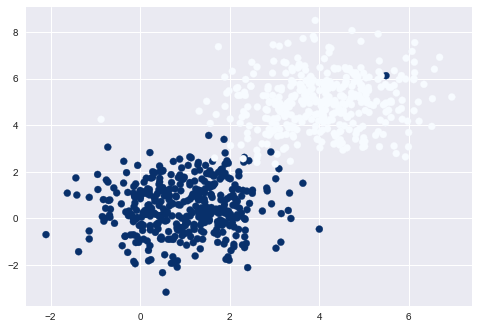

In [15]:
plt.scatter(X_train[:, 0], X_train[:,1], c = Y_train, cmap = plt.cm.Blues_r)
plt.show()

In [16]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

#Training Data

X_train = (X_train - x_mean)/x_std

#Testing Data : 
# No need to calcluate mean & std for testing data, use training data mean & std to deviate points exactly the same amount

X_test = (X_test - x_mean)/x_std

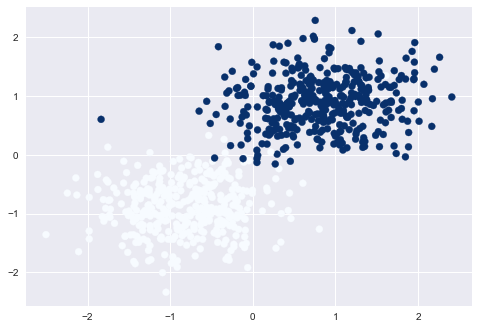

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c =Y_train, cmap = plt.cm.Blues);

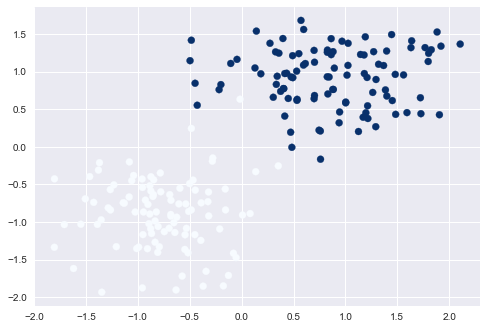

In [18]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test, cmap = plt.cm.Blues);

# Logistic Regression

## Hypothesis

$ H_{\theta}(X) = \frac{1}{1 + e^{-\theta^{T}X}}  = \frac{1}{1 + e^{-(\theta_{0}X_{0}^{i} + \theta_{1}X_{1}^{i} + ... + \theta_{n}X_{n}^{i})}}$

In [19]:
def sigmoid(Value):
    return (1.0/ (1.0 + np.exp(-Value)))

In [20]:
def Hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

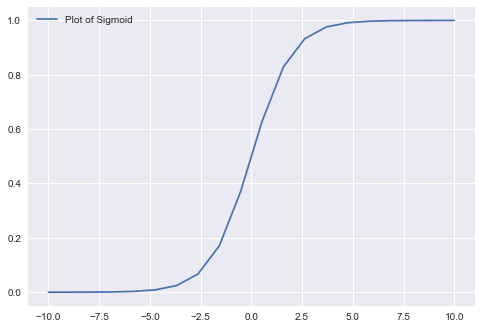

In [21]:
example = np.linspace(-10, 10, 20)
plt.plot(example, sigmoid(example), label = "Plot of Sigmoid")
plt.legend();

## Error

$ Error = -\frac{1}{m}\sum_{i=1}^{m}(Y^{i}log(h^{i}) + ((1 - Y^{i})log(1 - h^{i})))$

In [22]:
def error(X, Y, theta):
    hx = Hypothesis(X, theta)
    
    error = -1 * np.mean((Y * np.log(hx)) + ((1 -Y) * np.log(1 - hx)))
    return error
    

## Descent
$ Descent = \sum_{i=1}^{m}(Y^{i} - h_{\theta}(X^{i}))X^{i}_{j} $

In [23]:
def Descent(X, Y, theta):
    m = X.shape[0]
    hx = Hypothesis(X, theta)
    grad = np.dot(X.T, (Y - hx))
    
    return grad/m
    

# Gradient Descent

$ Gradient Descent :
\theta = \theta +  \alpha\sum_{i=1}^{m}(Y^{i} - h_{\theta}(X^{i}))X^{i}_{j} = \theta + \alpha Gradient$

In [24]:
def GradientDescent(X, Y, lr = 0.1, max_itr = 500):
    
    n = X.shape[1]
    error_list = []
    theta = np.zeros((n, 1))
    
    for i in range(max_itr):
        error_list.append(error(X, Y, theta))
        
        grad = Descent(X, Y, theta)
        theta = theta + lr * grad
    
    return theta, error_list
            

In [25]:
# Adding Bias Column
ones = np.ones((X_train.shape[0], 1))

X_new_train = np.hstack((ones, X_train))
print(X_new_train.shape)

(800, 3)


In [26]:
X_new_train[:3, :]

array([[ 1.        , -0.65654845, -0.7149402 ],
       [ 1.        ,  1.0302176 ,  0.73023704],
       [ 1.        ,  0.64529927,  1.26039167]])

In [27]:
print(Y_train.shape)
Y_train = Y_train.reshape((-1, 1)) # Making it 2D
print(Y_train.shape) 

(800,)
(800, 1)


In [28]:
theta, error_list = GradientDescent(X_new_train, Y_train)

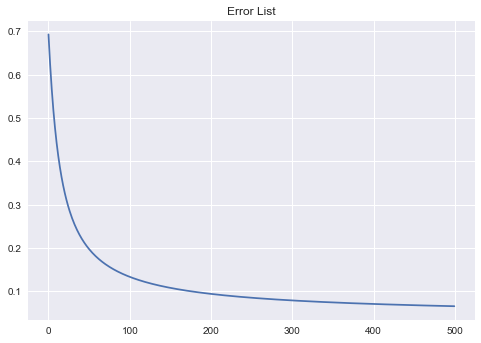

In [29]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.title("Error List");